In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.vector_ar import vecm
from statsmodels.tsa.stattools import adfuller

In [9]:
parser = lambda x: pd.to_datetime(x, format="%Y-%m-%d")
df = pd.read_csv('data/Final.csv',date_parser=parser,parse_dates=['Date'])
df.head()

,Date,GDP,UnRate,GDPgrowth
0,1995-01-01,1692669,16.9,1.444820
1,1995-04-01,1700185,16.9,1.776130
2,1995-07-01,1707524,16.9,1.726636
3,1995-10-01,1714263,16.9,1.578660
4,1996-01-01,1738318,19.3,5.612908


<AxesSubplot:xlabel='Date', ylabel='GDP'>

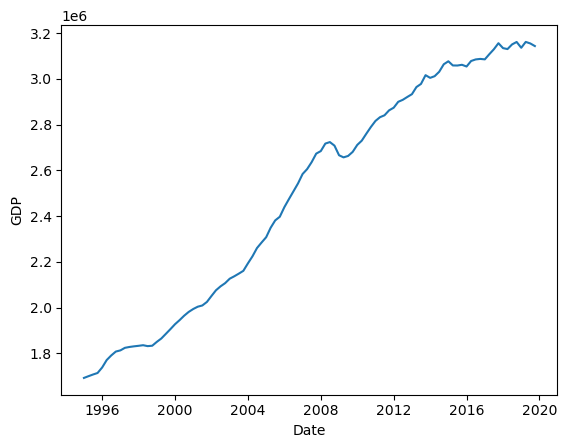

In [10]:
sns.lineplot(x='Date',y='GDP',data=df)

In [14]:
df['LGDP'] = df['GDP'].apply(lambda x: np.log(x))

In [38]:
def ADFuller_test(dframe,rvar=False,auto='AIC',reg='c',maxl=12):
    test = adfuller(x = dframe,autolag=auto,regression=reg,maxlag=maxl)
    if test[1] <= 0.05:
        sig = 'Variable is stationary'
    else:
        sig = 'Variable is nonstationary'
    results = {
        't-statistic':test[0],
        'pvalue':test[1],
        'critical values':test[4],
        'stationarity':sig

    }
    return results

In [29]:
ADFuller_test(df['LGDP'])

{'t-statistic': -2.0922375785762024,
 'pvalue': 0.2476473444374977,
 'critical values': {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 'stationarity': 'Variable is nonstationary'}

In [35]:
ADFuller_test(df['LGDP'].diff().dropna())

{'t-statistic': -5.275550449891832,
 'pvalue': 6.151666793699424e-06,
 'critical values': {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 'stationarity': 'Variable is stationary'}

In [30]:
ADFuller_test(df['GDPgrowth'],reg='ct')

{'t-statistic': -5.777036845292535,
 'pvalue': 6.3778812690040294e-06,
 'critical values': {'1%': -4.053254236405479,
  '5%': -3.455806184392646,
  '10%': -3.1535907061122397},
 'stationarity': 'Variable is stationary'}

In [27]:
ADFuller_test(df['UnRate'])

{'t-statistic': -2.075087716315337,
 'pvalue': 0.2546492079815922,
 'critical values': {'1%': -3.506057133647011,
  '5%': -2.8946066061911946,
  '10%': -2.5844100201994697},
 'stationarity': 'Variable is nonstationary'}

In [41]:
ADFuller_test(df['UnRate'].diff().dropna())

{'t-statistic': -3.157628271508245,
 'pvalue': 0.02257210091547192,
 'critical values': {'1%': -3.506057133647011,
  '5%': -2.8946066061911946,
  '10%': -2.5844100201994697},
 'stationarity': 'Variable is stationary'}